# Details of Data

gameNum - each game I played has 4 corresponding rows, 1 per player.

player - the starting position corresponding to each row

points - how many points the player ended the game with (the game is won with 10 or more)

me - the position I played during the game

2, 3, …, 12 - how many rolls of each value occurred during the game (game is played with 2 dice)

settlement1, settlement2 - each starting settlement is logged as 3 pairs of [number, resource]:

L = lumber

C = clay

S = sheep

W = wheat

O = ore

3G = 3:1 general port

2(X) = 2:1 port for resource X

D = desert

# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
winners= pd.read_csv("Winners.csv")
df=pd.read_csv("catan stats.csv")

In [3]:
df.iloc[:,:16]

,gameNum,player,points,me,2,3,4,5,6,7,8,9,10,11,12,settlement1
0,1,1,5,NaN,1,3,5,8,7,10,6,7,3,4,1,6
1,1,2,9,1.0,1,3,5,8,7,10,6,7,3,4,1,5
2,1,3,10,NaN,1,3,5,8,7,10,6,7,3,4,1,5
3,1,4,5,NaN,1,3,5,8,7,10,6,7,3,4,1,6
4,2,1,10,NaN,1,6,3,9,10,8,14,9,3,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,NaN,0,5,3,6,13,13,5,3,9,4,1,8
196,50,1,5,NaN,1,7,4,5,7,17,10,8,4,3,0,6
197,50,2,10,1.0,1,7,4,5,7,17,10,8,4,3,0,8
198,50,3,4,NaN,1,7,4,5,7,17,10,8,4,3,0,5


In [4]:
winners.drop(["Tsettlement1","Tsettlement2"],axis=1,inplace=True)

In [5]:
winners.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,...,23,24,25,26,Total Prob,1Resource,2Resource,prob1,prob2,Prob Sum
0,1,3,10,5,S,6,S,12,W,8,...,4,S,3,C,20,SSW,COS,"5,6,12","3,4,8","3,4,5,6,8,12"
1,2,1,10,6,W,9,O,10,O,8,...,10,L,0,2L,20,OOW,LLW,"6,9,10","0,8,10","0,6,8,9,10,10"
2,3,2,10,5,W,8,O,10,C,4,...,9,W,11,S,21,COW,LSW,"5,8,10","4,9,11","4,5,8,9,10,11"
3,4,2,10,6,W,9,L,3,C,5,...,8,S,10,C,23,CLW,CSS,"3,6,9","5,8,10","3,5,6,8,9,10"
4,5,2,10,5,O,6,W,11,O,5,...,9,L,10,L,22,OOW,LLS,"5,6,11","5,9,10","5,5,6,9,10,11"


# Do the Winners get the best Settlement Positions?

In [6]:
df4=pd.read_csv("df4.csv")

In [7]:
def maxp(x):
    game= x
    i=0
    max=0
    while(i<=3):
        a=df4[df4["gameNum"]==game]["Total Prob"]
        b=a.iloc[i]
        if (b>max):
            max=b
        i=i+1
    return max

In [8]:
df4["MaxProb per Game"]=df4["gameNum"]

In [9]:
df4["MaxProb per Game"]=df4["MaxProb per Game"].apply(lambda x: maxp(x))

In [10]:
df4.head()

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,FirstResource,SecondResource,MaxProb per Game
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18,CCL,LOW,22
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21,OWW,LOS,22
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,SSW,COS,22
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22,LLO,LLS,22
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,OOW,LLW,22


In [11]:
def func(x):
    game= x
    i=0
    maxi=False
    maxpoints1=df4[df4["gameNum"]==game]
    maxpoints=maxpoints1["MaxProb per Game"].max()
    while(i<=3):
        a=winners[winners["gameNum"]==game]
        b=a["Total Prob"].max()
        if (b==maxpoints):
            maxi=True
        i=i+1
    return maxi

In [12]:
df4["Winner has MaxProb"]=df4["gameNum"]
df4["Winner has MaxProb"]=df4["Winner has MaxProb"].apply(lambda x: func(x))

In [13]:
df4

,gameNum,player,points,settlement1,16,17,18,19,20,settlement2,22,23,24,25,26,Total Prob,FirstResource,SecondResource,MaxProb per Game,Winner has MaxProb
0,1,1,5,6,L,3,C,11,C,9,L,10,W,11,O,18,CCL,LOW,22,False
1,1,2,9,5,W,8,O,10,W,4,L,5,S,11,O,21,OWW,LOS,22,False
2,1,3,10,5,S,6,S,12,W,8,O,4,S,3,C,20,SSW,COS,22,False
3,1,4,5,6,O,9,L,3,L,4,L,8,L,10,S,22,LLO,LLS,22,False
4,2,1,10,6,W,9,O,10,O,8,W,10,L,0,2L,20,OOW,LLW,22,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,8,S,4,W,3,O,4,L,5,C,11,S,19,OSW,CLS,25,True
196,50,1,5,6,O,9,W,10,L,5,C,6,O,11,C,23,LOW,CCO,23,False
197,50,2,10,8,L,4,C,3,W,4,S,9,O,11,C,19,CLW,COS,23,False
198,50,3,4,5,C,8,L,10,L,5,S,9,O,2,S,21,CLL,OSS,23,False


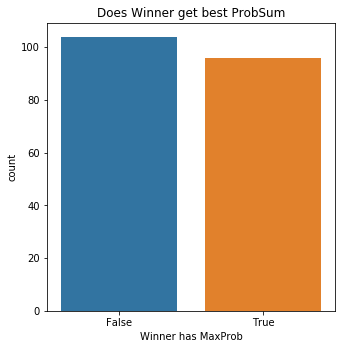

In [14]:
figure=plt.figure(figsize=(4,4))
axes=figure.add_axes([0,0,1,1])
axes.set_title("Does Winner get best ProbSum")
sns.countplot(x="Winner has MaxProb",data=df4)

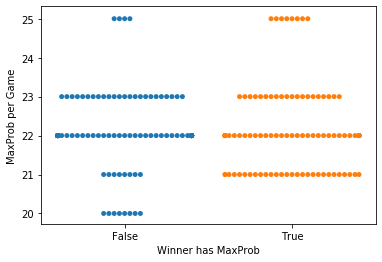

In [15]:
sns.swarmplot(x="Winner has MaxProb",y="MaxProb per Game",data=df4)

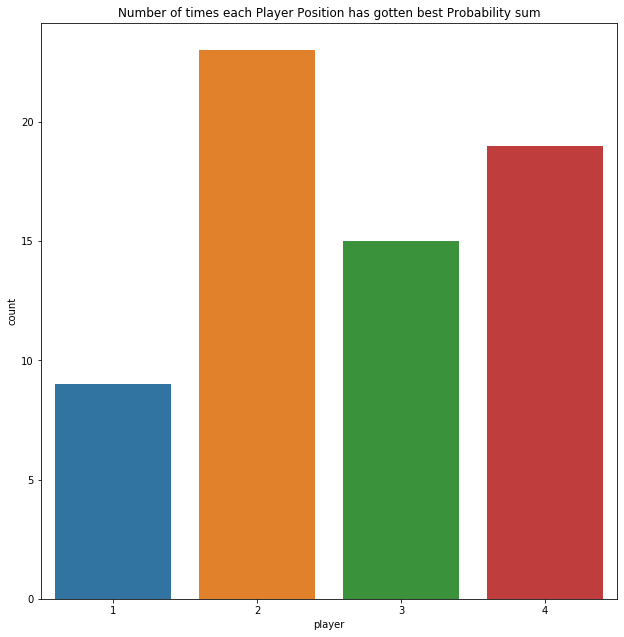

In [16]:
figure=plt.figure(figsize=(8,8))
axes=figure.add_axes([0,0,1,1])
axes.set_title("Number of times each Player Position has gotten best Probability sum")
sns.countplot(df4[df4["MaxProb per Game"]==df4["Total Prob"]]["player"])

# Do the Winners get the Most Resources?

In [17]:
df1=df.iloc[:,27:]

In [18]:
def nume(num):
    numbers= num.split(",")
    numbers = [int(i) for i in numbers]
    numbers.sort()
    numbers=','.join([str(elem) for elem in numbers])
    return numbers

In [19]:
df4['Tprob']=df4['settlement1'].astype(str) + "," + df4['17'].astype(str) + "," + df4['19'].astype(str) + "," + df4['settlement2'].astype(str) + "," + df4['23'].astype(str) + "," + df4['25'].astype(str)
df4['Tprob']=df4['Tprob'].apply(lambda x: nume(x))

In [20]:
def prod(x):
    game= x
    winnerprod1=df2[df2["points"]>=10]
    winnerprod2=winnerprod1[winnerprod1["gameNum"]==game]
    winnerprod=winnerprod2["production"].max()  #Winners production
    a=df2[df2["gameNum"]==game]
    b=a["production"].max()  #Returning Max Production Value
    if winnerprod==b :
        return "MaxProd"
    else :
        return "Not MaxProd"

In [21]:
df2=pd.concat([df4,df1],axis=1)
df2["Winner has MaxProduction"]=df2["gameNum"]
df2['Winner has MaxProduction']=df2['Winner has MaxProduction'].apply(lambda x: prod(x))

In [22]:
df2.drop(["16","18","20","22","24","26","FirstResource","SecondResource","settlement1","settlement2","17","19","23","25"],axis=1,inplace=True)
df2=df2[["gameNum","player","points","Tprob","Total Prob","MaxProb per Game","Winner has MaxProb","production","Winner has MaxProduction","tradeGain",
"robberCardsGain","totalGain","tradeLoss","robberCardsLoss","tribute","totalLoss","totalAvailable"]]

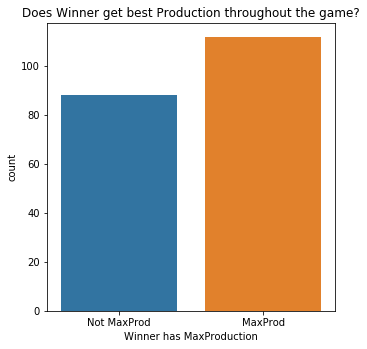

In [23]:
figure=plt.figure(figsize=(4,4))
axes=figure.add_axes([0,0,1,1])
axes.set_title("Does Winner get best Production throughout the game?")
sns.countplot(x="Winner has MaxProduction",data=df2)

In [24]:
y_ticks=np.arange(0,61,5)

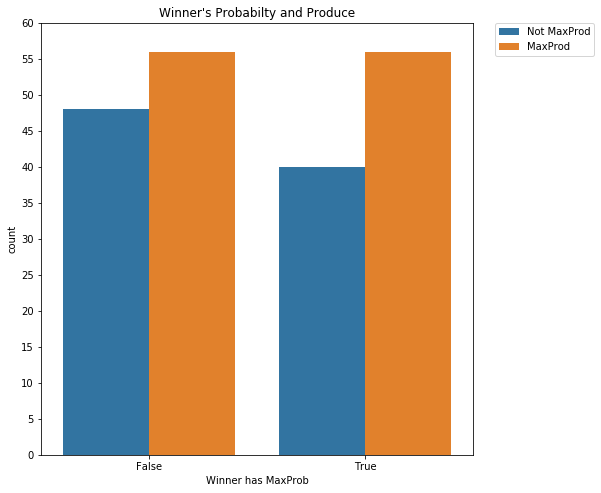

In [25]:
figure=plt.figure(figsize=(6,6))
axes=figure.add_axes([0,0,1,1])
axes.set_title("Winner's Probabilty and Produce")
sns.countplot(x="Winner has MaxProb",data=df2,hue="Winner has MaxProduction")
plt.yticks(y_ticks)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #To relocate legend outside plot

# Winners Gain and Loss

In [26]:
def gains(x):
    game= x
    winnerprod1=df2[df2["points"]>=10]
    winnerprod2=winnerprod1[winnerprod1["gameNum"]==game]
    winnerprod=winnerprod2["totalGain"].max()  #Winners totalGain
    a=df2[df2["gameNum"]==game]
    b=a["totalGain"].max()  #Returning Max totalGain Value
    if winnerprod==b :
        return "MaxGain"
    else :
        return "Not MaxGain"

In [27]:
df2["Winner has MaxGain"]=df2["gameNum"]
df2["Winner has MaxGain"]=df2["Winner has MaxGain"].apply(lambda x: gains(x))
df2=df2[["gameNum","player","points","Tprob","Total Prob","MaxProb per Game","Winner has MaxProb","production","Winner has MaxProduction","tradeGain",
"robberCardsGain","totalGain","Winner has MaxGain","tradeLoss","robberCardsLoss","tribute","totalLoss","totalAvailable"]]

In [28]:
df2.head()

,gameNum,player,points,Tprob,Total Prob,MaxProb per Game,Winner has MaxProb,production,Winner has MaxProduction,tradeGain,robberCardsGain,totalGain,Winner has MaxGain,tradeLoss,robberCardsLoss,tribute,totalLoss,totalAvailable
0,1,1,5,"3,6,9,10,11,11",18,22,False,38,Not MaxProd,5,2,45,MaxGain,10,2,4,16,29
1,1,2,9,"4,5,5,8,10,11",21,22,False,48,Not MaxProd,8,6,62,MaxGain,11,1,8,20,42
2,1,3,10,"3,4,5,6,8,12",20,22,False,44,Not MaxProd,14,9,67,MaxGain,24,4,0,28,39
3,1,4,5,"3,4,6,8,9,10",22,22,False,42,Not MaxProd,12,0,54,MaxGain,24,6,0,30,24
4,2,1,10,"0,6,8,9,10,10",20,22,False,60,Not MaxProd,15,16,91,MaxGain,28,10,0,38,53


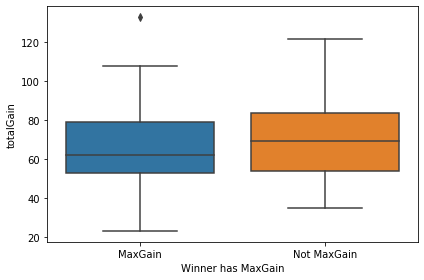

In [29]:
a=sns.boxplot(x="Winner has MaxGain",y="totalGain", data=df2)
plt.tight_layout()

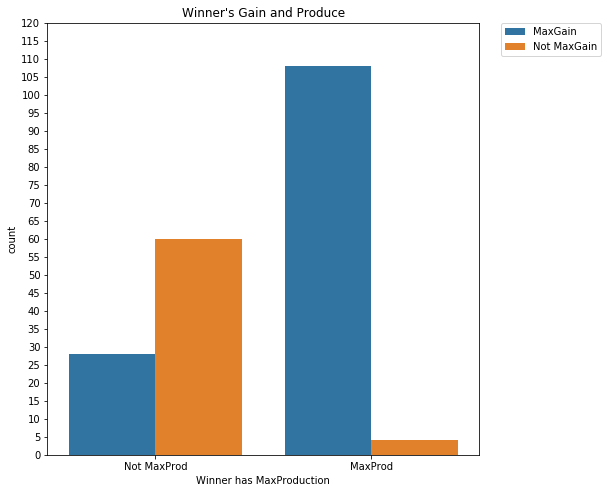

In [30]:
yticks=np.arange(0,121,5)
figure=plt.figure(figsize=(6,6))
axes=figure.add_axes([0,0,1,1])
axes.set_title("Winner's Gain and Produce")
sns.countplot(x="Winner has MaxProduction",data=df2,hue="Winner has MaxGain")
plt.yticks(yticks)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #To relocate legend outside plot

In [31]:
def loss(x):
    game= x
    winnerloss1=df2[df2["points"]>=10]
    winnerloss2=winnerloss1[winnerloss1["gameNum"]==game]
    winnerloss=winnerloss2["totalLoss"].min()  #Winners totalLoss
    a=df2[df2["gameNum"]==game]
    b=a["totalLoss"].min()  #Returning Min TotalLoss Value
    if winnerloss==b :
        return "minLoss"
    else :
        return "Not minLoss"

In [32]:
df2["Winner has MinLoss"]=df2["gameNum"]
df2["Winner has MinLoss"]=df2["Winner has MinLoss"].apply(lambda x: loss(x))
df2=df2[["gameNum","player","points","Tprob","Total Prob","MaxProb per Game","Winner has MaxProb","production","Winner has MaxProduction","tradeGain",
"robberCardsGain","totalGain","Winner has MaxGain","tradeLoss","robberCardsLoss","tribute","totalLoss","Winner has MinLoss","totalAvailable"]]

In [33]:
df2.head()

,gameNum,player,points,Tprob,Total Prob,MaxProb per Game,Winner has MaxProb,production,Winner has MaxProduction,tradeGain,robberCardsGain,totalGain,Winner has MaxGain,tradeLoss,robberCardsLoss,tribute,totalLoss,Winner has MinLoss,totalAvailable
0,1,1,5,"3,6,9,10,11,11",18,22,False,38,Not MaxProd,5,2,45,MaxGain,10,2,4,16,Not minLoss,29
1,1,2,9,"4,5,5,8,10,11",21,22,False,48,Not MaxProd,8,6,62,MaxGain,11,1,8,20,Not minLoss,42
2,1,3,10,"3,4,5,6,8,12",20,22,False,44,Not MaxProd,14,9,67,MaxGain,24,4,0,28,Not minLoss,39
3,1,4,5,"3,4,6,8,9,10",22,22,False,42,Not MaxProd,12,0,54,MaxGain,24,6,0,30,Not minLoss,24
4,2,1,10,"0,6,8,9,10,10",20,22,False,60,Not MaxProd,15,16,91,MaxGain,28,10,0,38,Not minLoss,53


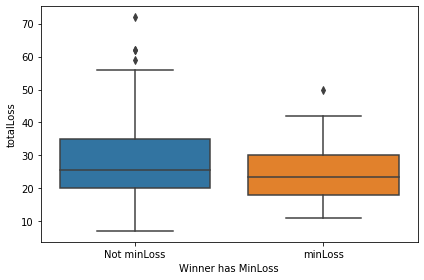

In [34]:
a=sns.boxplot(x="Winner has MinLoss",y="totalLoss", data=df2)
plt.tight_layout()

In [35]:
def avail(x):
    game= x
    winneravail1=df2[df2["points"]>=10]
    winneravail2=winneravail1[winneravail1["gameNum"]==game]
    winneravail=winneravail2["totalAvailable"].max()  #Winners totalAvailable
    a=df2[df2["gameNum"]==game]
    b=a["totalAvailable"].max()  #Returning Max TotalAvailable Value
    if winneravail==b :
        return "maxAvailable"
    else :
        return "Not maxAvail"

In [36]:
df2["Winner has MaxAvail"]=df2["gameNum"]
df2["Winner has MaxAvail"]=df2["Winner has MaxAvail"].apply(lambda x: avail(x))
df2.head()

,gameNum,player,points,Tprob,Total Prob,MaxProb per Game,Winner has MaxProb,production,Winner has MaxProduction,tradeGain,robberCardsGain,totalGain,Winner has MaxGain,tradeLoss,robberCardsLoss,tribute,totalLoss,Winner has MinLoss,totalAvailable,Winner has MaxAvail
0,1,1,5,"3,6,9,10,11,11",18,22,False,38,Not MaxProd,5,2,45,MaxGain,10,2,4,16,Not minLoss,29,Not maxAvail
1,1,2,9,"4,5,5,8,10,11",21,22,False,48,Not MaxProd,8,6,62,MaxGain,11,1,8,20,Not minLoss,42,Not maxAvail
2,1,3,10,"3,4,5,6,8,12",20,22,False,44,Not MaxProd,14,9,67,MaxGain,24,4,0,28,Not minLoss,39,Not maxAvail
3,1,4,5,"3,4,6,8,9,10",22,22,False,42,Not MaxProd,12,0,54,MaxGain,24,6,0,30,Not minLoss,24,Not maxAvail
4,2,1,10,"0,6,8,9,10,10",20,22,False,60,Not MaxProd,15,16,91,MaxGain,28,10,0,38,Not minLoss,53,maxAvailable


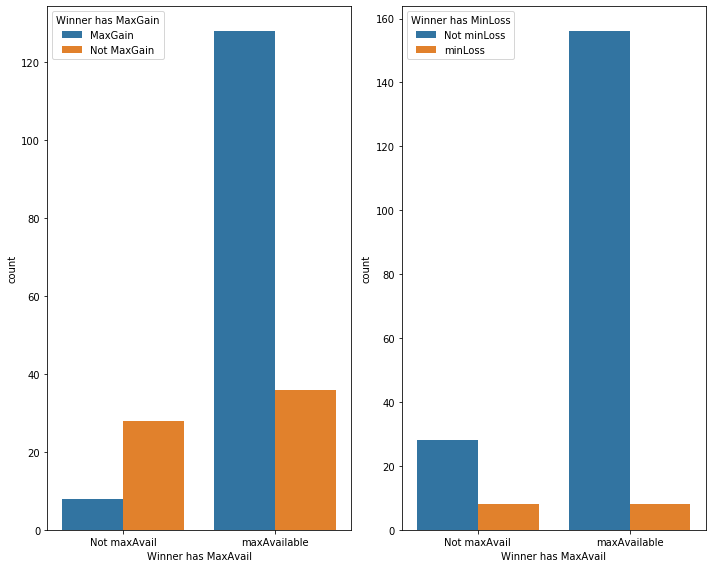

In [37]:
fig=plt.figure(figsize=(10,8))
axes=fig.add_axes([0,0,1,1])
axes.set_title("Winners Net Gain vs Total Gain and Loss")
plt.subplot(1,2,1)
sns.countplot(x="Winner has MaxAvail",hue="Winner has MaxGain",data=df2)
plt.subplot(1,2,2)
sns.countplot(x="Winner has MaxAvail",hue="Winner has MinLoss",data=df2)
plt.tight_layout()

# Dice Rolls

In [38]:
df3=df2.iloc[:,:5]

In [39]:
df3=pd.concat([df3,df.iloc[:,3:15]],axis=1)

In [40]:
df3.head()

,gameNum,player,points,Tprob,Total Prob,me,2,3,4,5,6,7,8,9,10,11,12
0,1,1,5,"3,6,9,10,11,11",18,NaN,1,3,5,8,7,10,6,7,3,4,1
1,1,2,9,"4,5,5,8,10,11",21,1.0,1,3,5,8,7,10,6,7,3,4,1
2,1,3,10,"3,4,5,6,8,12",20,NaN,1,3,5,8,7,10,6,7,3,4,1
3,1,4,5,"3,4,6,8,9,10",22,NaN,1,3,5,8,7,10,6,7,3,4,1
4,2,1,10,"0,6,8,9,10,10",20,NaN,1,6,3,9,10,8,14,9,3,3,3


In [41]:
def countdice(x): #gameNum,playerNum as string
    i=0
    sumi=0
    player=x.split(",")[1] #Getting player string
    player=int(player) 
    game=x.split(",")[0] #Getting GameNum string
    game=int(game)
    df4=df3[df3["gameNum"]==game][["Tprob"]]
    df5=df4.reset_index()["Tprob"]
    probT=df5[player-1].split(",") #Splitting Tprob
    probint=[int(i) for i in probT] #Tprob to integer
    while(i<=5):    #All Tprob has 6 digits
        z=probint[i]
        sumi=sumi+ df3.iloc[:,5+(z-1)][0] #Adding every roll
        i=i+1
    return (sumi)

In [42]:
df3["RollCount"]=df3["gameNum"].astype(str) + "," + df3["player"].astype(str)
df3["RollCount"]=df3["RollCount"].apply(lambda x: countdice(x))

In [43]:
winner1=df3[df3["points"]>=10]
notwinner=df3[df3["points"]<10]
df3

,gameNum,player,points,Tprob,Total Prob,me,2,3,4,5,6,7,8,9,10,11,12,RollCount
0,1,1,5,"3,6,9,10,11,11",18,NaN,1,3,5,8,7,10,6,7,3,4,1,28
1,1,2,9,"4,5,5,8,10,11",21,1.0,1,3,5,8,7,10,6,7,3,4,1,34
2,1,3,10,"3,4,5,6,8,12",20,NaN,1,3,5,8,7,10,6,7,3,4,1,30
3,1,4,5,"3,4,6,8,9,10",22,NaN,1,3,5,8,7,10,6,7,3,4,1,31
4,2,1,10,"0,6,8,9,10,10",20,NaN,1,6,3,9,10,8,14,9,3,3,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,49,4,5,"3,4,4,5,8,11",19,NaN,0,5,3,6,13,13,5,3,9,4,1,31
196,50,1,5,"5,6,6,9,10,11",23,NaN,1,7,4,5,7,17,10,8,4,3,0,36
197,50,2,10,"3,4,4,8,9,11",19,1.0,1,7,4,5,7,17,10,8,4,3,0,30
198,50,3,4,"2,5,5,8,9,10",21,NaN,1,7,4,5,7,17,10,8,4,3,0,33


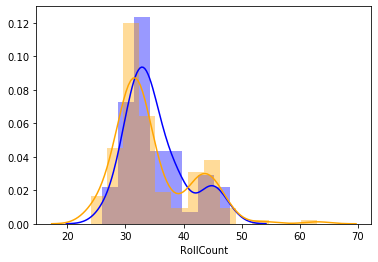

In [44]:
sns.distplot(df3[df3["points"]>=10]["RollCount"],color="blue")
sns.distplot(df3[df3["points"]<10]["RollCount"],color="orange")

In [45]:
print(df3[df3["points"]>=10]["RollCount"].mean())
print(df3[df3["points"]<10]["RollCount"].mean())

35.06
34.64666666666667


Text(0.5, 1, 'Non-Winner Luck vs. Total Probability')

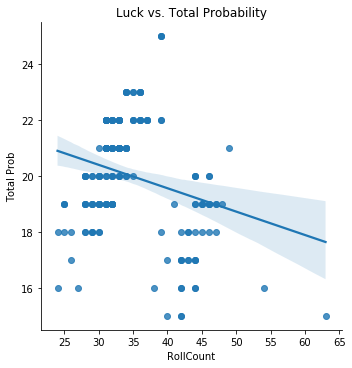

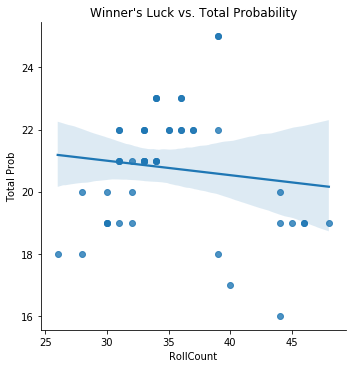

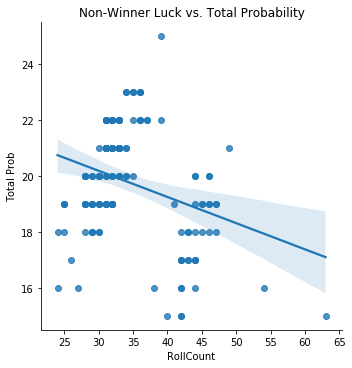

In [46]:
ax=sns.lmplot(x="RollCount", y="Total Prob", data=df3)
plt.title("Luck vs. Total Probability")
ax1=sns.lmplot(x="RollCount", y="Total Prob", data=winner1)
plt.title("Winner's Luck vs. Total Probability")
ax2=sns.lmplot(x="RollCount", y="Total Prob", data=notwinner)
plt.title("Non-Winner Luck vs. Total Probability")